Similar to Experiment 75, but here we use the version of SMC-RWM and MS-RWM that is in the python script. In particular:

- Weights are computed and normalized using the log-sum-exp trick.
- Sequence of tolerances is chosen adaptively based on quantile of distances.
- Particles are initially sampled from the prior but then we set $\epsilon_0 = \max d_{i}$ where $d_i$ are the distances between the particle $i$ and the manifold.
- Step size is adapted based on the proxy-acceptance-probability

In [1]:
import numpy as np
from numpy import zeros, eye, array, diag, exp, ones
from numpy.linalg import solve, norm
from numpy.random import choice, default_rng
from scipy.stats import multivariate_normal as MVN
from scipy.special import logsumexp
from scipy.stats import uniform as udist
import math
import time
from copy import deepcopy

import matplotlib.pyplot as plt
from matplotlib import rc
from ipywidgets.widgets import IntSlider
from ipywidgets.widgets import interact
from warnings import resetwarnings

from Manifolds.GeneralizedEllipseNew import GeneralizedEllipse
from markov_snippets import MSAdaptive, SMCAdaptive

In [4]:
def generate_settings(
    d=10, 
    N=5000,
    B=20,
    δ=0.1,
    δmin=1e-3,
    δmax=100.0,
    εmin=1e-8,
    min_pm=1e-4,
    maxiter=500,
    verbose=True,
    εs_fixed=None,
    adaptiveε=True,
    adaptiveδ=True,
    z0_manual=None,
    pm_target=0.23,
    pm_switch=0.05,
    prior_seed=1234,
    low_memory=True,
    integrator='rwm',
    εprop_switch=0.01,
    ε0_manual=None,
    quantile_value=0.9,
    initialization='prior',
    switch_strategy='pm',
    prior='uniform',
    kernel='uniform',
    prior_scale=7,
    thinning=10,
    burnin=100):
    # Generate the manifold
    μ = zeros(d)
    Σ = diag(np.r_[0.1, ones(d-1)])  
    level_set_value = -23
    manifold = GeneralizedEllipse(μ, Σ, exp(level_set_value), prior=prior, kernel=kernel, prior_scale=prior_scale)
    # grab arguments
    arguments = locals()
    return arguments

In [5]:
SETTINGS_RWM           = generate_settings(integrator='rwm')
SETTINGS_THUG          = generate_settings(integrator='thug')
SETTINGS_RWM_THEN_THUG = generate_settings(integrator='rwm_then_thug')

# Random Walk Only

#### SMC

In [ ]:
SMC_RWM = SMCAdaptive(SETTINGS_RWM)
_ = SMC_RWM.sample()

Stochastic Kernel: RWM.
Setting initial epsilon to εmax = 359.0601375831
Iteration:  1
	Particles resampled.
	Epsilon: 260.5650365021
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.38800000
	Step-size adapted to: 0.10822043
Iteration:  2
	Particles resampled.
	Epsilon: 219.1175396815
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.36980000
	Step-size adapted to: 0.11605569
Iteration:  3
	Particles resampled.
	Epsilon: 187.6015815676
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.34620000
	Step-size adapted to: 0.12299826
Iteration:  4
	Particles resampled.
	Epsilon: 159.9685568927
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.33080000
	Step-size adapted to: 0.12935624
Iteration:  5
	Particles resampled.
	Epsilon: 137.7428543791
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.33220000
	Step-size adapted to: 0.13613815
Iteration:  6
	Particles resampled.
	Epsilon: 121.7269352881
	

	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.19160000
	Step-size adapted to: 0.11398538
Iteration:  49
	Particles resampled.
	Epsilon: 13.4742153788
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.18720000
	Step-size adapted to: 0.11157201
Iteration:  50
	Particles resampled.
	Epsilon: 12.6302877209
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.18140000
	Step-size adapted to: 0.10889348
Iteration:  51
	Particles resampled.
	Epsilon: 11.9250658531
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.18980000
	Step-size adapted to: 0.10672657
Iteration:  52
	Particles resampled.
	Epsilon: 11.2252045960
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.17460000
	Step-size adapted to: 0.10381082
Iteration:  53
	Particles resampled.
	Epsilon: 10.5647596986
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.17260000
	Step-size adapted to: 0.10087380
Iteration:  54
	Particl

#### Markov Snippets

In [ ]:
MS_RWM = MSAdaptive(SETTINGS_RWM)
_ = MS_RWM.sample()

# Random Walk switch to THUG

#### SMC

#### Markov Snippets

# MS-RWM

In [6]:
MS_RWM = MSAdaptive(SETTINGS)
_ = MS_RWM.sample()

Integrator: RWM.
Setting initial epsilon to εmax = 359.0601375831
Iteration:  1
	Trajectories constructed.
	Epsilon: 54.16241336
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.942
	Step-size adapted to: 0.14278931
Iteration:  2
	Trajectories constructed.
	Epsilon: 25.77651326
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.929
	Step-size adapted to: 0.20256690
Iteration:  3
	Trajectories constructed.
	Epsilon: 11.24247345
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.904
	Step-size adapted to: 0.28377174
Iteration:  4
	Trajectories constructed.
	Epsilon: 2.31867338
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.826
	Step-size adapted to: 0.38232468
Iteration:  5
	Trajectories constructed.
	Epsilon: 0.23457022
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0

# SMC

In [17]:
# def generate_setting_old(p, B, δ, N, ϵ0=20, thinning=10, thug=True, verbose=True, initialization='init_RWMϵ0', burnin=100, δ0=0.01, kernel_type='uniform', ϵmin=1e-4, quantile_value=0.01, maxiter=50, ϵprop_switch=0.05, pmoved_switch=0.15, switch_strategy='ap', δmin=1e-4, δmax=100.0, ap_target=0.3, use_autograd=False, init_manifold_prior=True, min_prop_moved=1e-3, seed_for_prior_initialization=1234, prior_scale=10):
#     """Generates an object from which one can grab the settings. This allows one to run multiple scenarios."""
#     μ  = zeros(p)
#     Σ  = diag(np.r_[0.1, ones(p-1)])             
#     level_set_value = -23    
#     ellipse = GeneralizedEllipse(μ, Σ, exp(level_set_value), prior='uniform', kernel='uniform', prior_scale=prior_scale)
#     ξ0 = ellipse.sample(advanced=True)
#     resetwarnings()
#     if δ0 is None:
#         δ0 = δ
#     return {
#         'd' : p,
#         'ystar': level_set_value,
#         'ξ0': ξ0,
#         'B': B,
#         'δ': δ,
#         'N': N,
#         'manifold': ellipse,
#         'thinning': thinning,
#         'thug': thug,
#         'verbose': verbose,
#         'initialization': initialization,
#         'burnin': burnin,
#         'δ0': δ0,
#         'kernel_type': kernel_type,
#         'ϵmin': ϵmin,
#         'quantile_value': quantile_value,
#         'maxiter': maxiter,
#         'ϵprop_switch': ϵprop_switch,
#         'pmoved_switch': pmoved_switch,
#         'switch_strategy': switch_strategy,
#         'δmin': δmin,
#         'δmax': δmax,
#         'ap_target': ap_target,
#         'ϵ0': ϵ0,
#         'use_autograd': use_autograd,
#         'init_manifold_prior': init_manifold_prior,
#         'min_prop_moved': 1e-3,
#         'seed_for_prior_initialization': seed_for_prior_initialization
#     }

In [21]:
# SETTINGS_OLD = generate_setting_old(
#     p=10,
#     B=20, 
#     δ=0.1, 
#     N=5000, 
#     thinning=10, 
#     δ0=0.01, 
#     kernel_type='uniform', 
#     thug=False, 
#     verbose=True, 
#     initialization='init_prior', 
#     burnin=100, 
#     maxiter=500, 
#     ϵmin=1e-8, 
#     quantile_value=0.9,
#     δmin=1e-3, 
#     δmax=100.0, 
#     ap_target=0.23,
#     min_prop_moved=1e-4,
#     seed_for_prior_initialization=1234,
#     prior_scale=20
# )

In [6]:
SMC_RWM = SMCAdaptive(SETTINGS)
_ = SMC_RWM.sample()

Stochastic Kernel: RWM.
Setting initial epsilon to εmax = 359.0601375831
Iteration:  1
	Particles resampled.
	Epsilon: 53.0567328124
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.03780000
	Step-size adapted to: 0.09083732


####################################
### SWITCHING TO THUG KERNEL ###
####################################


Iteration:  2
	Particles resampled.
	Epsilon: 25.4666551962
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.08720000
	Step-size adapted to: 0.08457766
Iteration:  3
	Particles resampled.
	Epsilon: 11.3762551889
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.09820000
	Step-size adapted to: 0.07918368
Iteration:  4
	Particles resampled.
	Epsilon: 5.6746942120
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.07160000
	Step-size adapted to: 0.07315425
Iteration:  5
	Particles resampled.
	Epsilon: 5.6438988746
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.0

	Epsilon: 5.4386585064
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.07340000
	Step-size adapted to: 0.00207253
Iteration:  49
	Particles resampled.
	Epsilon: 5.4386548005
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.07260000
	Step-size adapted to: 0.00191568
Iteration:  50
	Particles resampled.
	Epsilon: 5.4386529822
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.07160000
	Step-size adapted to: 0.00176981
Iteration:  51
	Particles resampled.
	Epsilon: 5.4386520735
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.07120000
	Step-size adapted to: 0.00163472
Iteration:  52
	Particles resampled.
	Epsilon: 5.4386508412
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.08060000
	Step-size adapted to: 0.00151705
Iteration:  53
	Particles resampled.
	Epsilon: 5.4386502324
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.07800000
	Step-size adapted to: 0.00140603
Itera

# MS

In [ ]:
# MS_RWM = MSAdaptiveTolerancesAdaptiveδUni(SETTINGS)
# _ = MS_RWM.sample()

# Comparison

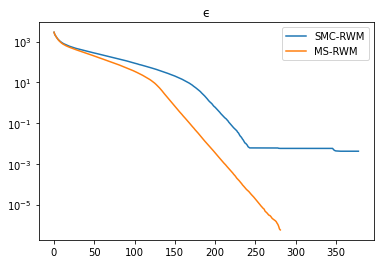

In [29]:
fig, ax = plt.subplots()
ax.set_title("ϵ")
ax.plot(SMC_RWM.ϵs, label='SMC-RWM')
ax.plot(MS_RWM.ϵs, label='MS-RWM')
ax.set_yscale('log')
ax.legend()
plt.show()

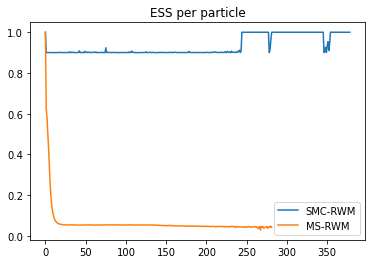

In [24]:
fig, ax = plt.subplots()
ax.set_title("ESS per particle")
ax.plot(np.array(SMC_RWM.ESS)/SMC_RWM.N, label='SMC-RWM')
ax.plot(np.array(MS_RWM.ESS)/(MS_RWM.N*(MS_RWM.B+1)), label='MS-RWM')
ax.legend()
plt.show()

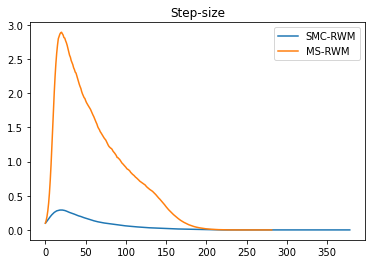

In [25]:
fig, ax = plt.subplots()
ax.set_title("Step-size")
ax.plot(SMC_RWM.δs, label='SMC-RWM')
ax.plot(MS_RWM.δs, label='MS-RWM')
ax.legend()
plt.show()

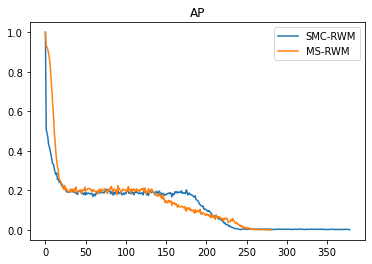

In [27]:
fig, ax = plt.subplots()
ax.set_title("AP")
ax.plot(SMC_RWM.aps, label='SMC-RWM')
ax.plot(MS_RWM.PROP_MOVED, label='MS-RWM')
ax.legend()
plt.show()

In [32]:
def plot_histogram(n):
    fig, ax = plt.subplots(figsize=(20, 4))
    _, bins, _ = ax.hist(MS_RWM.K_RESAMPLED[n, :], density=True, bins=20, edgecolor='k', color='lightsalmon')
    ax.set_xticks(bins)
    ax.set_xticklabels(bins.astype(int))
    return plt.show()
    
interact(plot_histogram, n=(0, len(MS_RWM.ϵs) - 2))

interactive(children=(IntSlider(value=140, description='n', max=280), Output()), _dom_classes=('widget-interac…

<function __main__.plot_histogram(n)>